In [1]:
from qutip import *
import numpy as np

Setting parameters

In [2]:
# Defining the system Hamiltonian
eps = 0.0    # Energy of the 2-level system.
Del = 0.2    # Tunnelling term
Hsys = 0.5 * eps * sigmaz() + 0.5 * Del * sigmax()
# Initial state of the system.
rho0 = basis(2, 0) * basis(2, 0).dag()
tlist=np.linspace(0,10,100)
# defining Ohmic bath properties
alpha=0.05
T=0.5
wc=2
s=1


Obtaining an Ohmic Bath via Correlation functions

If no Nk option is specified than the Ohmic bath is obtained by fitting the ohmic correlation function

In [3]:
obp=heom.OhmicBath(alpha,T,wc,s,sigmaz())

9.215899355496491e-05 0.00010900419119839903
Parameters: 
 [kr=1]: lam=[0.08541628]; gamma=[-2.85375869]; w0=[1.97473901] with normalized RMSE 9.215899355496491e-05 
 [ki=1]: lam=[-0.3659501]; gamma=[-3.38241625]; w0=[0.99542597] with normalized 0.00010900419119839903
6.084369464410258e-05 5.0509286299456975e-05
Parameters: 
 [kr=2]: lam=[0.03049447 0.05099939]; gamma=[-1.8120479  -2.32269947]; w0=[0.67751598 3.28936137] with normalized RMSE 6.084369464410258e-05 
 [ki=2]: lam=[-0.3659501  -0.05659804]; gamma=[-2.45611152 -2.87547651]; w0=[0.36178587 3.6058036 ] with normalized 5.0509286299456975e-05
6.754163900712918e-05 9.87040080046155e-06
Parameters: 
 [kr=3]: lam=[-1.35666993 -0.02399588  1.46380039]; gamma=[-1.47373592 -0.87652184 -1.51962861]; w0=[2.29737944 1.43823448 2.27173186] with normalized RMSE 6.754163900712918e-05 
 [ki=3]: lam=[-0.3659501  -0.3659501   0.01990936]; gamma=[-1.62221503 -4.10899759 -8.24462866]; w0=[0.06311188 1.19231523 9.93212983] with normalized 9.8704

In [4]:
options = {'nsteps':15000, 'store_states':True, 'rtol':1e-12, 'atol':1e-12, 'method':"bdf"}
HEOM_corr_fit = heom.HEOMSolver(Hsys, obp.Bath_corr, max_depth=4, options=options)
result_corr=HEOM_corr_fit.run(rho0,tlist)

10.1%. Run time:   0.18s. Est. time left: 00:00:00:01
20.2%. Run time:   0.29s. Est. time left: 00:00:00:01
30.3%. Run time:   0.40s. Est. time left: 00:00:00:00
40.4%. Run time:   0.50s. Est. time left: 00:00:00:00
50.5%. Run time:   0.60s. Est. time left: 00:00:00:00
60.6%. Run time:   0.70s. Est. time left: 00:00:00:00
70.7%. Run time:   0.80s. Est. time left: 00:00:00:00
80.8%. Run time:   0.90s. Est. time left: 00:00:00:00
90.9%. Run time:   1.00s. Est. time left: 00:00:00:00
100.0%. Run time:   1.10s. Est. time left: 00:00:00:00
Total run time:   1.10s


Obtaining an Ohmic Bath via Spectral density

If the Nk option is specified than the Ohmic bath is obtained by fitting the ohmic spectral density 

In [5]:
obp2=heom.OhmicBath(alpha,T,wc,s,sigmaz(),Nk=4)

Parameters [k=1]: lam=[0.75659448]; gamma=[3.5587454]; w0=[0.2], Obtain a normalized RMSE of 0.00014398392031897463
Parameters [k=2]: lam=[0.4014482  0.27229385]; gamma=[2.86865298 2.49925906]; w0=[3.61148474 0.2       ], Obtain a normalized RMSE of 7.111440058788281e-05
Parameters [k=3]: lam=[ 0.93310168  0.03226896 -0.44555105]; gamma=[4.26858492 1.47013586 8.3595062 ]; w0=[0.2       0.2       9.3357237], Obtain a normalized RMSE of 1.1895054824245062e-05
Parameters [k=4]: lam=[ 0.97412732  0.07387968  0.0013009  -0.54220089]; gamma=[4.59176022 2.00436575 0.61446653 8.59639226]; w0=[0.2        0.2        0.2        7.96777894], Obtain a normalized RMSE of 2.070455673653808e-06


In [6]:
Ltot = liouvillian(Hsys) + obp2.terminator
HEOM_spectral_fit = heom.HEOMSolver(Ltot, obp2.Bath_spec, max_depth=4, options=options)
result_spectral=HEOM_spectral_fit.run(rho0,tlist)

10.1%. Run time:   0.15s. Est. time left: 00:00:00:01
20.2%. Run time:   0.20s. Est. time left: 00:00:00:00
30.3%. Run time:   0.25s. Est. time left: 00:00:00:00
40.4%. Run time:   0.29s. Est. time left: 00:00:00:00
50.5%. Run time:   0.33s. Est. time left: 00:00:00:00
60.6%. Run time:   0.36s. Est. time left: 00:00:00:00
70.7%. Run time:   0.39s. Est. time left: 00:00:00:00
80.8%. Run time:   0.42s. Est. time left: 00:00:00:00
90.9%. Run time:   0.46s. Est. time left: 00:00:00:00
100.0%. Run time:   0.48s. Est. time left: 00:00:00:00
Total run time:   0.48s


Let us see the results from both ways of obtaining the ohmic bath parameters 

In [7]:
import matplotlib.pyplot as plt
def projection(result,i,j):
    return [result.states[k][i,j] for k in range(len(result.states))]

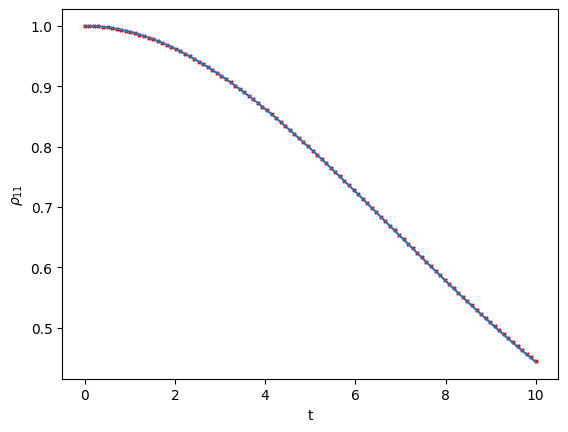

In [10]:
plt.plot(tlist,projection(result_spectral,0,0))
plt.scatter(tlist,projection(result_corr,0,0),s=5,marker='x',color='red')
plt.xlabel('t')
plt.ylabel(r'$\rho_{11}$')
plt.show()

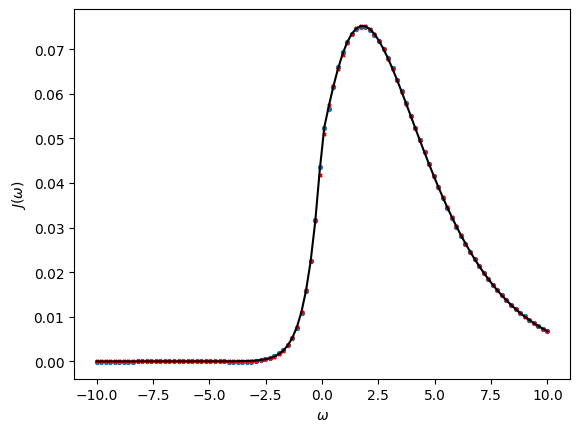

In [20]:
w=np.linspace(-10,10,100)
plt.scatter(w,obp.corr_spectrum_approx(w),s=8)
plt.scatter(w,obp2.spec_spectrum_approx(w),s=5,marker='x',color='red')
plt.plot(w,obp.ohmic_power_spectrum(w),color='k')
plt.ylabel(r'$J( \omega )$')
plt.xlabel(r'$\omega$')
plt.show()

Both approaches of obtaining the ohmicbath yield almost identical results, as expected 